In [119]:
import itertools
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import floor, log10
from collections import Counter
from tqdm import tqdm


In [120]:
# Define the suits and values of a deck of cards
suits = ('diamonds', 'clubs', 'hearts', 'spades')
values = (2, 3, 4, 5, 6, 7, 8, 9, 10, 'jack', 'queen', 'king', 'ace')
values_for_straight =('ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'jack', 'queen', 'king', 'ace')

# Generate all possible card combinations
random_combinations = [f'{value2}_of_{value1}' for value2, value1 in itertools.product(values, suits)]

# Shuffle the card combinations
random.shuffle(random_combinations)


In [121]:
def plot_cards(num_of_cards, print_probability=False):
    count = 0
    coef = 0.3

    # Determine the figure size based on the number of cards
    if num_of_cards == 3:
        fig = plt.figure(figsize=(coef*9, coef*4))
        plt.title('Flop')
        plt.axis('off')
    elif num_of_cards == 4:
        fig = plt.figure(figsize=(coef*12, coef*4))
        plt.title('Turn')
        plt.axis('off')
    elif num_of_cards == 5:
        fig = plt.figure(figsize=(coef*15, coef*4))
        plt.title('River')
        plt.axis('off')
    elif num_of_cards == 0:
        calculate_probability(num_of_cards)
        return
    else:
        print("Unsupported number of cards.")
        return

    # Plot the card images
    for i, combination in enumerate(random_combinations):
        if count < num_of_cards:
            image_path = f'cards_pictures/PNG-cards-1.3/{combination}.png'
            image = mpimg.imread(image_path)

            ax = fig.add_subplot(1, num_of_cards, i+1)
            ax.imshow(image)
            ax.axis('off')  # Remove the axis labels

            count += 1
        else:
            break

    plt.show()

    if print_probability:
        calculate_probability(num_of_cards)

def round_up(x):
    if x == 0:
        return 0
    elif x >= 0.1:
        return round(x,2)
    else:
        return round(x, -int(floor(log10(abs(x)))))

def print_probability(value, num_of_combinations, type, round=True):
    probability = value / num_of_combinations * 100
    probability_round = round_up(probability)
    if round:
        print(f'Probability of {type}: {probability_round}%')
    else:
        print(f'Probability of {type}: {probability_round}%')



In [122]:
def calculate_probability(num_of_cards):
    pairs, two_pairs, sets, straights, flushs, full_houses, foaks, straights_flushs, royal_flushs = 0, 0, 0, 0, 0, 0, 0, 0, 0
    num_of_combinations = 0

    used_cards = random_combinations[:num_of_cards]
    unused_cards = random_combinations[num_of_cards:]

    # Generate all possible combinations of unused cards
    for combination in itertools.combinations(unused_cards, (7 - num_of_cards)):
        num_of_combinations += 1
        possible_set = used_cards + list(combination)

        # Extract values and suits from the possible set
        set_of_values = set(card.split('_')[0] for card in possible_set)
        value_counts = Counter(card.split('_')[0] for card in possible_set)
        suits_counts = Counter(card.split('_')[2] for card in possible_set)

        # Check for different hand combinations
        has_pair = any(count >= 2 for count in value_counts.values())
        has_two_pair = sum(count >= 2 for count in value_counts.values()) >= 2
        has_set = any(count >= 3 for count in value_counts.values())
        has_straight = False

        # Check for straight combinations
        for i in range(10):
            values_in_row = values_for_straight[i:i+5]
            if set(values_in_row).issubset(set_of_values):
                has_straight = True

        has_flush = any(count >= 5 for count in suits_counts.values())
        has_foak = any(count == 4 for count in value_counts.values())

        # Increment counts for each hand combination
        if has_pair:
            pairs += 1
        if has_two_pair:
            two_pairs += 1
        if has_set:
            sets += 1
            value_dict = dict(value_counts)
            if 2 in value_dict.values() and 3 in value_dict.values():
                full_houses += 1
        if has_straight:
            straights += 1
        if has_flush:
            flushs += 1
        if has_foak:
            foaks += 1
        if has_straight and has_flush:
            straights_flushs += 1
            if set(values_for_straight[9:14]).issubset(set_of_values):
                royal_flushs += 1

    # Map counts to their corresponding hand types
    hand_types = {
        pairs: 'pair',
        two_pairs: 'two pair',
        sets: 'three of a kind',
        straights: 'straight',
        flushs: 'flush',
        full_houses: 'full house',
        foaks: 'four of a kind',
        straights_flushs: 'straight flush',
        royal_flushs: 'royal flush'
    }

    # Print the probabilities of each hand type
    for count, hand_type in hand_types.items():
        if count > 0:
            print_probability(count, num_of_combinations, hand_type)


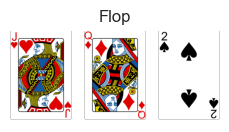

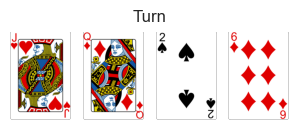

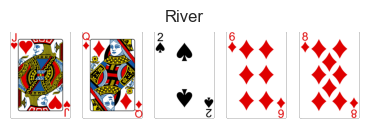

In [123]:
plot_cards(3)
plot_cards(4)
plot_cards(5)